In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df=pd.read_csv("/content/spam.tsv",sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [36]:
# Label Ham => Valid Message
# SPAM => Invalid message

In [37]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

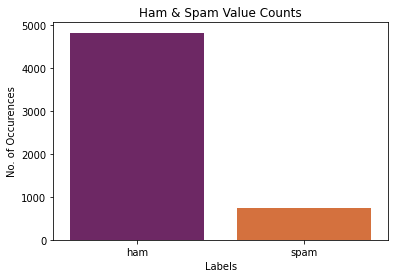

In [38]:
count=df['label'].value_counts()
sns.barplot(x=count.index,y=count.values,palette="inferno")
plt.ylabel("No. of Occurences")
plt.xlabel("Labels")
plt.title("Ham & Spam Value Counts")
plt.show()

In [39]:
# Data is Skewed So we need to balance the data

In [40]:
ham=df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [41]:
spam=df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [42]:
ham.shape,spam.shape

((4825, 4), (747, 4))

In [43]:
ham=ham.sample(spam.shape[0])

In [44]:
ham.shape

(747, 4)

In [45]:
data=ham.append(spam,ignore_index=True)
data.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


EDA - Exploratory Data Analysis

In [46]:
# No. of Characters in HAM and SPAM Labelled messages

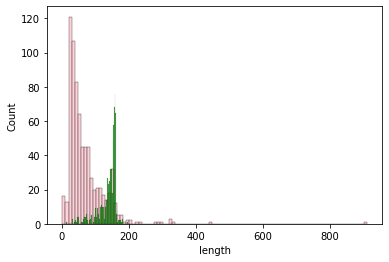

In [47]:
sns.histplot(data[data['label']=='ham']['length'],bins=100,alpha=0.7,color="Pink")
sns.histplot(data[data['label']=='spam']['length'],bins=100,alpha=0.7,color="Green")
plt.show()

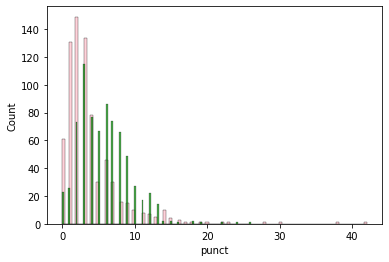

In [48]:
sns.histplot(data[data['label']=='ham']['punct'],bins=100,alpha=0.7,color="Pink")
sns.histplot(data[data['label']=='spam']['punct'],bins=100,alpha=0.7,color="Green")
plt.show()

DATA Preparation

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [57]:
x_train,x_test,y_train,y_test=train_test_split(data['message'],data['label'],test_size=0.3,random_state=0,shuffle=True,stratify=data['label'])

In [51]:
# Bag of Words Creation
vectorizer=TfidfVectorizer()

In [52]:
x_train=vectorizer.fit_transform(x_train)

In [53]:
x_train

<1045x3674 sparse matrix of type '<class 'numpy.float64'>'
	with 17704 stored elements in Compressed Sparse Row format>

In [54]:
x_train.shape

(1045, 3674)

Random Forest Classifier along with Pipeline

In [55]:
clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',RandomForestClassifier(n_estimators=100,n_jobs=-1))])

In [58]:
clf.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [59]:
y_pred=clf.predict(x_test)

In [60]:
confusion_matrix(y_test,y_pred)

array([[223,   2],
       [ 27, 197]])

In [61]:
accuracy_score(y_test,y_pred)

0.9354120267260579

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.89      0.99      0.94       225
        spam       0.99      0.88      0.93       224

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



In [63]:
clf.predict(['We are testing our Model'])

array(['ham'], dtype=object)

In [64]:
clf.predict(["Congratulations!,you have won free tickets. Text 'WINNER' to 986578"])

array(['spam'], dtype=object)

SVM along with  Pipeline

In [114]:
clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',SVC(C=600,gamma='auto'))])

In [115]:
clf.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', SVC(C=600, gamma='auto'))])

In [116]:
y_pred=clf.predict(x_test)

In [117]:
confusion_matrix(y_test,y_pred)

array([[219,   6],
       [ 20, 204]])

In [118]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.97      0.94       225
        spam       0.97      0.91      0.94       224

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



In [119]:
accuracy_score(y_test,y_pred)

0.9420935412026726

In [120]:
clf.predict(['We are testing our Model'])

array(['ham'], dtype=object)

In [121]:
clf.predict(["Congratulations!,you have won free tickets. Text 'WINNER' to 986578"])

array(['spam'], dtype=object)